# PARTE 34: ÁRBOLES Y BOSQUES DE REGRESIÓN

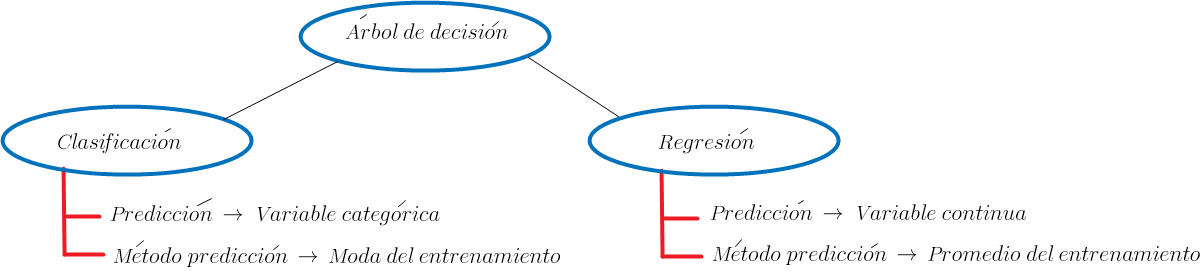

In [66]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/ÁRBOL DECISIÓN.png")

## PARTE 34.1: TEORÍA ÁRBOL DE REGRESIÓN

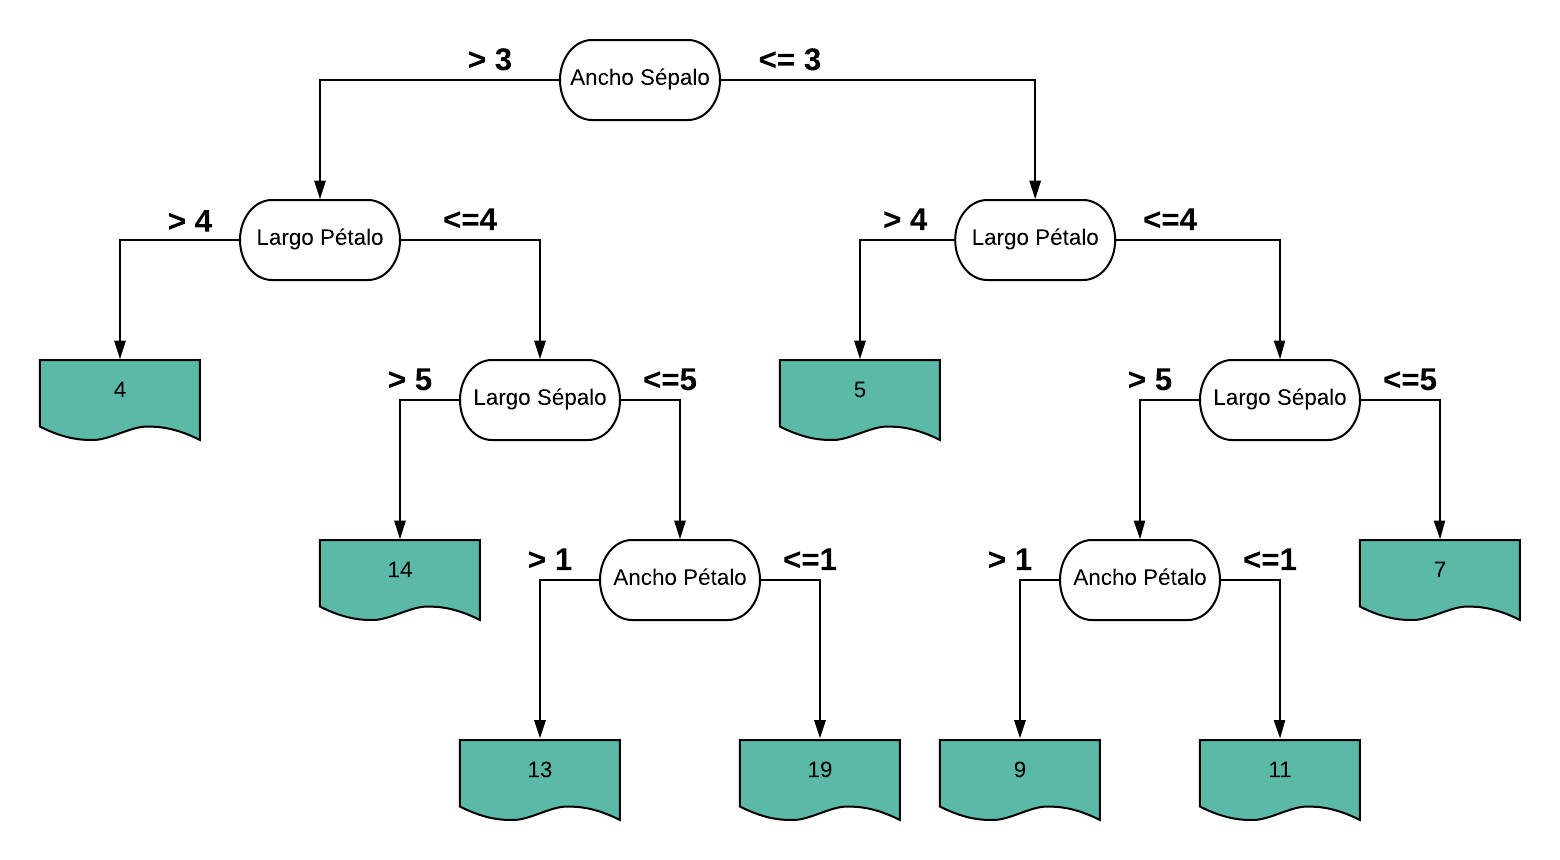

In [67]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/ÁRBOL REGRESIÓN.png")

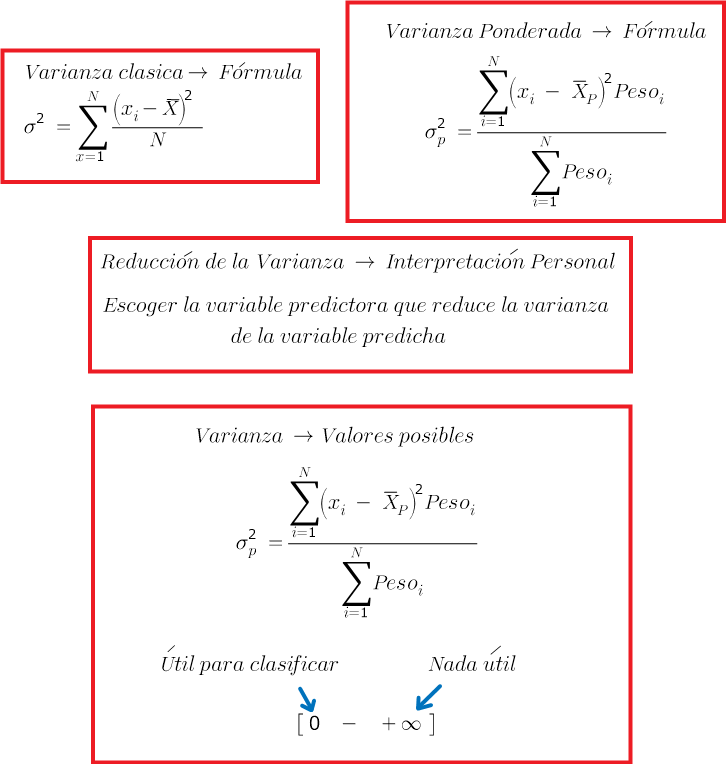

In [68]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/REDUCCION DE VARIANZA DEFINICIÓN.png")

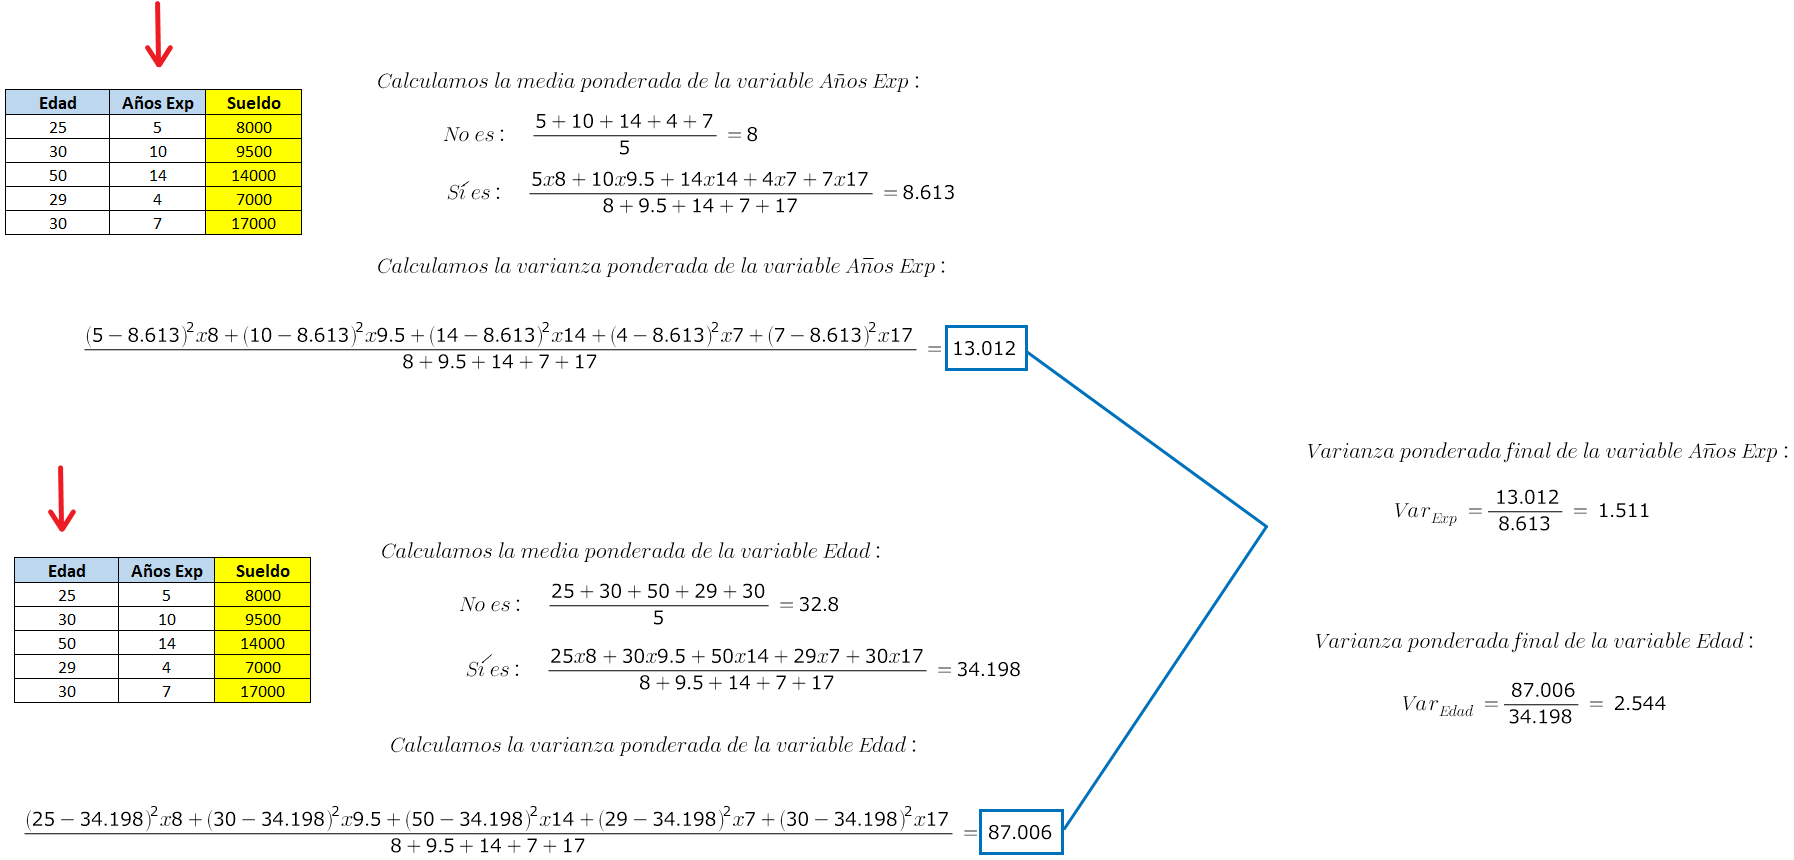

In [69]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/REDUCCIÓN DE VARIANZA CÁLCULO.png")

## PARTE 34.2: GENERACIÓN DE ÁRBOL DE REGRESIÓN SIN PODAR

### GENERACIÓN DE ÁRBOL SIN PODAR

In [70]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/25_1_CORRELACION_CARROS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["car_ID","CarName"],axis = 1)

VARIABLES_CAT = DATASET.select_dtypes(include=["object"])

#COLUMNAS CATEGÓRICAS:
COLUMNAS_CAT = VARIABLES_CAT.columns.tolist()

#----------------------------------------------------------------------------
#FUNCIÓN PARA GENERAR VARIABLES DUMMY:
def GENERAR_DUMMIES(DATASET,VARIABLE):
    DUMMY = pd.get_dummies(DATASET[VARIABLE],prefix=VARIABLE)
    DATASET = pd.concat([DATASET,DUMMY],axis=1)
    DATASET = DATASET.drop([VARIABLE], axis=1)
    return DATASET

#GENERACIÓN DE COLUMNAS DUMMY
for X in COLUMNAS_CAT:
    DATASET = GENERAR_DUMMIES(DATASET,X)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "price"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#GENERACIÓN DE ÁRBOL DE REGRESIÓN
from sklearn.tree import DecisionTreeRegressor
#min_samples_split -> CANTIDAD MÍNIMA DE MUESTRAS EN UN NODO PARA SUBDIVIDIRSE
#min_samples_leaf -> CANTIDAD MÍNIMA DE MUESTRAS EN UNA HOJA PARA EXISTIR 
#max_depth -> PROFUNDIDAD MÁXIMA PERMITIDA 

MODELO_ARBOL = DecisionTreeRegressor(max_depth=8)
MODELO_ARBOL.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#----------------------------------------------------------------------------
#VARIABLES RELEVANTES DE ÁRBOL DE REGRESIÓN
RANKING_VARIABLES = pd.DataFrame({
                            'VARIABLE': DATASET_ENTRENAMIENTO_X.columns.tolist(),
                            'IMPORTANCIA': MODELO_ARBOL.feature_importances_
                            })

RANKING_ORDENADO = RANKING_VARIABLES.sort_values('IMPORTANCIA', ascending=False).reset_index()
RANKING_ORDENADO = RANKING_ORDENADO.drop(["index"], axis = 1)

print("--------VARIABLES PREDICTORAS RELEVANTES--------")
print(RANKING_ORDENADO[RANKING_ORDENADO["IMPORTANCIA"]>0]["VARIABLE"].tolist())

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL MODELO
print("---------------------------SCORE ÁRBOL SIN PODAR---------------------------")
print("SCORE ÁRBOL ENTRENAMIENTO -> ",MODELO_ARBOL.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE ÁRBOL PRUEBAS -> ",MODELO_ARBOL.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))

from sklearn.metrics import mean_squared_error
ERROR_MODELO = mean_squared_error( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["ÁRBOL PREDICT"],
                                   squared = False)
print("ERROR MODELO -> ", ERROR_MODELO)

--------VARIABLES PREDICTORAS RELEVANTES--------
['enginesize', 'curbweight', 'horsepower', 'carwidth', 'peakrpm', 'wheelbase', 'highwaympg', 'carbody_convertible', 'carlength', 'enginetype_ohcf', 'citympg', 'carheight', 'stroke', 'carbody_hatchback', 'compressionratio', 'carbody_sedan', 'boreratio', 'fuelsystem_4bbl', 'carbody_wagon', 'aspiration_turbo', 'aspiration_std', 'symboling', 'doornumber_two', 'drivewheel_fwd', 'doornumber_four', 'drivewheel_4wd', 'fuelsystem_mpfi']
---------------------------SCORE ÁRBOL SIN PODAR---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.9963577830130411
SCORE ÁRBOL PRUEBAS ->  0.9207936637257264
ERROR MODELO ->  2519.1156082043194


### GRÁFICA DE ÁRBOL DE REGRESIÓN SIN PODAR

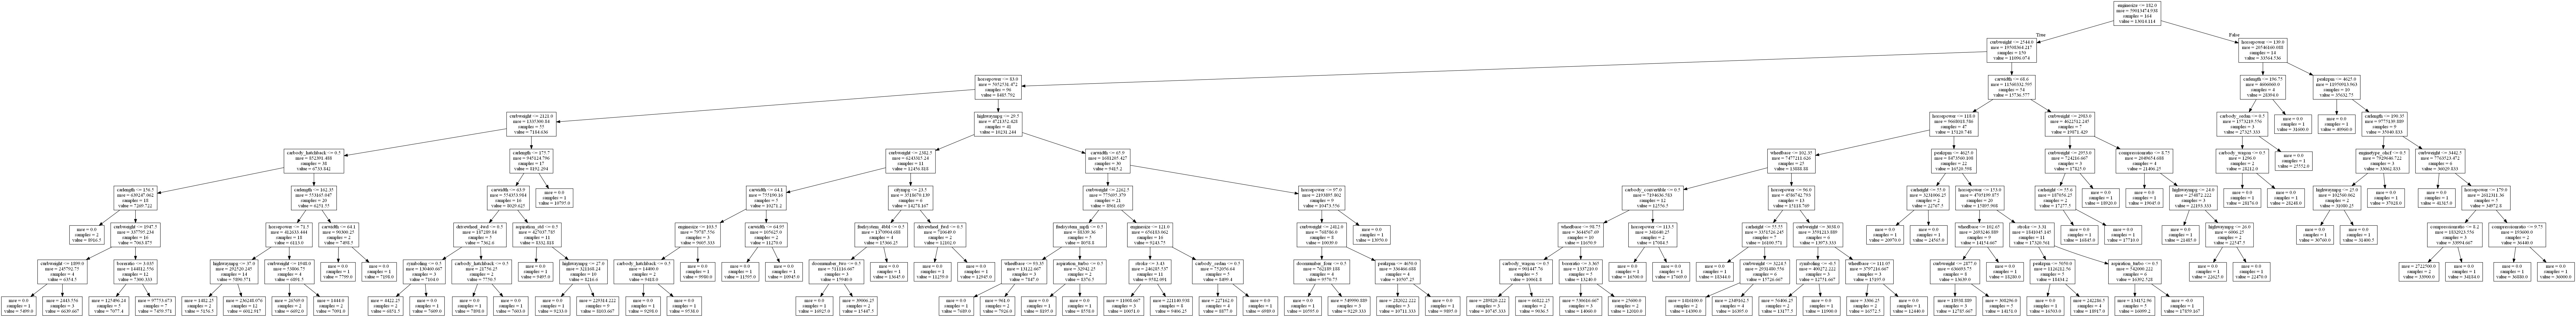

In [71]:
#GENERACIÓN DE IMAGEN ÁRBOL DE REGRESIÓN
import os
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#COMANDO DE GENERACIÓN DE ARCHIVO .dot
DOT_ARBOL = export_graphviz(MODELO_ARBOL, feature_names=DATASET_ENTRENAMIENTO_X.columns.tolist())

#GENERANDO GRÁFICO CON EL ARBOL .dot GENERANDO
GRAFICO = graph_from_dot_data(DOT_ARBOL)

#NECESARIO PARA LA GENERACIÓN DEL PNG
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#GENERACIÓN DEL GRÁFICO
GRAFICO.write_png('ARBOL_PRICE_SIN_PODAR.png')

from IPython.display import Image
Image(filename="ARBOL_PRICE_SIN_PODAR.png")

## PARTE 34.3: GENERACIÓN DE ÁRBOL DE REGRESIÓN PODADO

### GENERACIÓN DE ÁRBOL PODADO

In [72]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/25_1_CORRELACION_CARROS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["car_ID","CarName"],axis = 1)

VARIABLES_CAT = DATASET.select_dtypes(include=["object"])

#COLUMNAS CATEGÓRICAS:
COLUMNAS_CAT = VARIABLES_CAT.columns.tolist()

#----------------------------------------------------------------------------
#FUNCIÓN PARA GENERAR VARIABLES DUMMY:
def GENERAR_DUMMIES(DATASET,VARIABLE):
    DUMMY = pd.get_dummies(DATASET[VARIABLE],prefix=VARIABLE)
    DATASET = pd.concat([DATASET,DUMMY],axis=1)
    DATASET = DATASET.drop([VARIABLE], axis=1)
    return DATASET

#GENERACIÓN DE COLUMNAS DUMMY
for X in COLUMNAS_CAT:
    DATASET = GENERAR_DUMMIES(DATASET,X)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "price"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#AJUSTE ÓPTIMA DE ÁRBOL DE REGRESIÓN
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': range(0,100)}    
ANALISIS_ARBOL = GridSearchCV(estimator = DecisionTreeRegressor(max_depth = None), 
                              param_grid = param_grid,   
                              cv = 5,
                              refit = True,
                              return_train_score = True)

ANALISIS_ARBOL.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
MODELO_ARBOL = ANALISIS_ARBOL.best_estimator_

#----------------------------------------------------------------------------
#VARIABLES RELEVANTES DE ÁRBOL DE REGRESIÓN
RANKING_VARIABLES = pd.DataFrame({
                            'VARIABLE': DATASET_ENTRENAMIENTO_X.columns.tolist(),
                            'IMPORTANCIA': MODELO_ARBOL.feature_importances_
                            })

RANKING_ORDENADO = RANKING_VARIABLES.sort_values('IMPORTANCIA', ascending=False).reset_index()
RANKING_ORDENADO = RANKING_ORDENADO.drop(["index"], axis = 1)

print("--------VARIABLES PREDICTORAS RELEVANTES--------")
print(RANKING_ORDENADO[RANKING_ORDENADO["IMPORTANCIA"]>0]["VARIABLE"].tolist())

#----------------------------------------------------------------------------
#INDICADORES ÓPTIMOS
print("MEJOR PARÁMETRO DE AJUSTE -> ",ANALISIS_ARBOL.best_params_)
print("PROFUNDIDAD ÓPTIMA -> ",MODELO_ARBOL.get_depth())
print("TERMINALES ÓPTIMOS -> ",MODELO_ARBOL.get_n_leaves())

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL MODELO
print("---------------------------SCORE ÁRBOL PODADO---------------------------")
print("SCORE ÁRBOL ENTRENAMIENTO -> ",MODELO_ARBOL.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE ÁRBOL PRUEBAS -> ",MODELO_ARBOL.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))

from sklearn.metrics import mean_squared_error
ERROR_MODELO = mean_squared_error( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["ÁRBOL PREDICT"],
                                   squared = False)
print("ERROR MODELO -> ", ERROR_MODELO)

--------VARIABLES PREDICTORAS RELEVANTES--------
['enginesize', 'curbweight', 'horsepower', 'peakrpm', 'carwidth', 'wheelbase', 'highwaympg', 'carbody_convertible', 'carlength', 'citympg', 'carheight', 'boreratio', 'carbody_hatchback', 'carbody_sedan', 'compressionratio', 'aspiration_turbo', 'carbody_wagon', 'stroke', 'aspiration_std', 'enginetype_ohcv', 'fueltype_gas', 'fuelsystem_mpfi', 'symboling', 'drivewheel_4wd', 'drivewheel_fwd', 'enginetype_dohc', 'doornumber_two', 'enginetype_ohcf', 'cylindernumber_six', 'fuelsystem_1bbl', 'fueltype_diesel']
MEJOR PARÁMETRO DE AJUSTE ->  {'ccp_alpha': 1}
PROFUNDIDAD ÓPTIMA ->  13
TERMINALES ÓPTIMOS ->  156
---------------------------SCORE ÁRBOL PODADO---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.9992357373332302
SCORE ÁRBOL PRUEBAS ->  0.924569185934062
ERROR MODELO ->  2458.343316088316


### GRÁFICA DE ÁRBOL DE REGRESIÓN PODADO

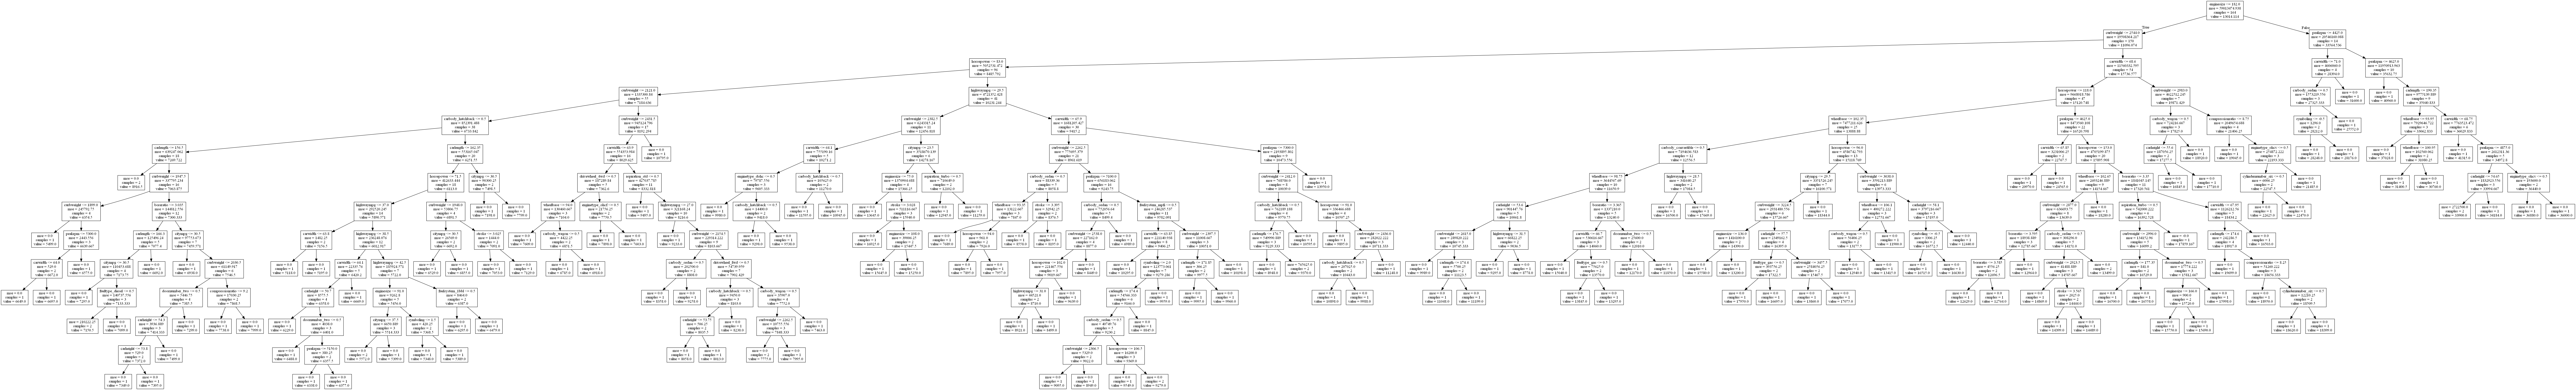

In [73]:
#GENERACIÓN DE IMAGEN ÁRBOL DE REGRESIÓN
import os
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#COMANDO DE GENERACIÓN DE ARCHIVO .dot
DOT_ARBOL = export_graphviz(MODELO_ARBOL, feature_names=DATASET_ENTRENAMIENTO_X.columns.tolist())

#GENERANDO GRÁFICO CON EL ARBOL .dot GENERANDO
GRAFICO = graph_from_dot_data(DOT_ARBOL)

#NECESARIO PARA LA GENERACIÓN DEL PNG
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#GENERACIÓN DEL GRÁFICO
GRAFICO.write_png('ARBOL_PRICE_PODADO.png')

from IPython.display import Image
Image(filename="ARBOL_PRICE_PODADO.png")

## PARTE 34.4: BOSQUE ALEATORIO DE REGRESIÓN

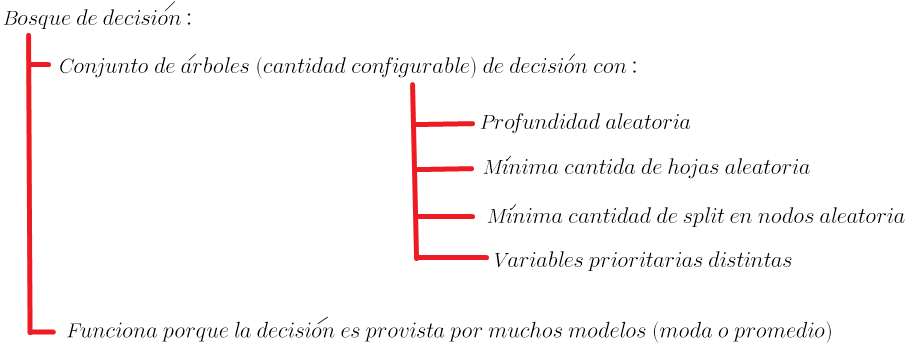

In [74]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/BOSQUE DECISIÓN.png")

### ANÁLISIS DE LA CANTIDAD DE ÁRBOLES ÓPTIMA

In [75]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/25_1_CORRELACION_CARROS.csv"
DATASET = pd.read_csv(RUTA)

DATASET = DATASET.drop(["car_ID","CarName"],axis = 1)
VARIABLES_CAT = DATASET.select_dtypes(include=["object"])

#COLUMNAS CATEGÓRICAS:
COLUMNAS_CAT = VARIABLES_CAT.columns.tolist()

#----------------------------------------------------------------------------
#FUNCIÓN PARA GENERAR VARIABLES DUMMY:
def GENERAR_DUMMIES(DATASET,VARIABLE):
    DUMMY = pd.get_dummies(DATASET[VARIABLE],prefix=VARIABLE)
    DATASET = pd.concat([DATASET,DUMMY],axis=1)
    DATASET = DATASET.drop([VARIABLE], axis=1)
    return DATASET

#GENERACIÓN DE COLUMNAS DUMMY
for X in COLUMNAS_CAT:
    DATASET = GENERAR_DUMMIES(DATASET,X)

#----------------------------------------------------------------------------
#OBTENIENDO CANTIDAD DE ÁRBOLES ÓPTIMO DE UN BOSQUE DE REGRESIÓN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

REP = KFold(n_splits=5)
SCORE = []
OOB_SCORE = []
ARBOLES = []

for VAL in range(40, 150, 5):
    FOLD_SCORE = []
    FOLD_OOB_SCORE = []
    MODELO_BOSQUE = RandomForestRegressor(oob_score=True , n_estimators=VAL)
    
    for INDICE_ENTRENAMIENTO , INDICE_PRUEBA in REP.split(DATASET):
        DATASET_ENTRENAMIENTO = DATASET.loc[INDICE_ENTRENAMIENTO]
        DATASET_PRUEBA = DATASET.loc[INDICE_PRUEBA]
        
        #VARIABLES PREDICHAS Y PREDICTORAS
        VY = "price"
        VX = DATASET.columns.tolist()
        VX.remove(VY)
        
        #GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
        DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
        DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()
        
        DATASET_PRUEBAS_Y = DATASET_PRUEBA[VY].copy()
        DATASET_PRUEBAS_X = DATASET_PRUEBA[VX].copy()
        
        #AJUSTE Y PRECISIÓN DEL MODELO
        MODELO_BOSQUE.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
        
        VAL_SCORE = MODELO_BOSQUE.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y)
        VAL_OOB_SCORE = MODELO_BOSQUE.oob_score_
        
        FOLD_SCORE.append(VAL_SCORE)
        FOLD_OOB_SCORE.append(VAL_OOB_SCORE)
        
    PROM_SCORE = np.mean(FOLD_SCORE)
    PROM_OOB_SCORE = np.mean(FOLD_OOB_SCORE)
    
    OOB_SCORE.append(PROM_OOB_SCORE)
    SCORE.append(PROM_SCORE)
    ARBOLES.append(VAL)

DATASET_SCORE = pd.DataFrame({
    "ARBOLES":ARBOLES,
    "SCORE":SCORE,
    "OOB_SCORE":OOB_SCORE,
})

#ELIGIENDO PROFUNDIDAD CON PROFUNDIDAD ÓPTIMA
DATASET_SCORE[DATASET_SCORE["OOB_SCORE"]== np.max(DATASET_SCORE["OOB_SCORE"])]

,ARBOLES,SCORE,OOB_SCORE
19,135,0.380813,0.925001


### IMPLEMENTADO EL BOSQUE

In [76]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/25_1_CORRELACION_CARROS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["car_ID","CarName"],axis = 1)

VARIABLES_CAT = DATASET.select_dtypes(include=["object"])

#COLUMNAS CATEGÓRICAS:
COLUMNAS_CAT = VARIABLES_CAT.columns.tolist()

#----------------------------------------------------------------------------
#FUNCIÓN PARA GENERAR VARIABLES DUMMY:
def GENERAR_DUMMIES(DATASET,VARIABLE):
    DUMMY = pd.get_dummies(DATASET[VARIABLE],prefix=VARIABLE)
    DATASET = pd.concat([DATASET,DUMMY],axis=1)
    DATASET = DATASET.drop([VARIABLE], axis=1)
    return DATASET

#GENERACIÓN DE COLUMNAS DUMMY
for X in COLUMNAS_CAT:
    DATASET = GENERAR_DUMMIES(DATASET,X)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "price"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#GENERACIÓN DE BOSQUE DE REGRESIÓN
from sklearn.ensemble import RandomForestRegressor
MODELO_BOSQUE = RandomForestRegressor(oob_score=True, n_estimators=90)
MODELO_BOSQUE.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["BOSQUE PREDICT"] = MODELO_BOSQUE.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["BOSQUE PREDICT"] = MODELO_BOSQUE.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL BOSQUE
print("---------------------------BOSQUE---------------------------")
print("SCORE BOSQUE ENTRENAMIENTO -> ",MODELO_BOSQUE.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE BOSQUE PRUEBAS -> ",MODELO_BOSQUE.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))
print("OOB SCORE BOSQUE -> ",MODELO_BOSQUE.oob_score_)

from sklearn.metrics import mean_squared_error
ERROR_MODELO = mean_squared_error( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["BOSQUE PREDICT"],
                                   squared = False)
print("ERROR MODELO -> ", ERROR_MODELO)

---------------------------BOSQUE---------------------------
SCORE BOSQUE ENTRENAMIENTO ->  0.9853173792954993
SCORE BOSQUE PRUEBAS ->  0.9462328529183373
OOB SCORE BOSQUE ->  0.8987664606864689
ERROR MODELO ->  2075.518614311823


---------------------------SCORE ÁRBOL SIN PODAR---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.9963577830130411
SCORE ÁRBOL PRUEBAS ->  0.8909733219581898
ERROR MODELO ->  2955.524242460146

---------------------------SCORE ÁRBOL PODADO---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.9992344443083001
SCORE ÁRBOL PRUEBAS ->  0.9218169224711441
ERROR MODELO ->  2502.7906101142144

---------------------------BOSQUE---------------------------
SCORE BOSQUE ENTRENAMIENTO ->  0.9859041506853868
SCORE BOSQUE PRUEBAS ->  0.9496978267595333
OOB SCORE BOSQUE ->  0.9022499092285432
ERROR MODELO ->  2007.5275336428915